In [1]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import azureml.dataprep as dprep
from misc.utils import ndcg, query_ratings, query_movie_ratings

c:\programdata\miniconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.24) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
ratings = dprep.read_csv(path='data/ml-latest-small/ratings.csv', 
                         inference_arguments=dprep.InferenceArguments.current_culture())

ratings = ratings.drop_columns(columns=['timestamp']).to_long(columns=['userId', 'movieId'])
ratings = ratings.set_name(name='ratings')

package = dprep.Package(arg=ratings)
package = package.save(file_path='ratings.dprep')

ratings.get_profile()

,Type,Min,Max,Count,Missing Count,Error Count,Lower Quartile,Median,Upper Quartile,Standard Deviation,Mean
userId,FieldType.DECIMAL,1.0,610.0,100836.0,0.0,0.0,175.315403,324.696584,476.657212,182.618491,326.127564
movieId,FieldType.DECIMAL,1.0,193609.0,100836.0,0.0,0.0,1195.783037,2999.663578,7983.624875,35530.987199,19435.295718
rating,FieldType.DECIMAL,0.5,5.0,100836.0,0.0,0.0,2.888792,3.634298,4.000000,1.042529,3.501557


In [3]:
ratings.head(5)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


# Ratings Count Distribution
Find distibution of ratings counts

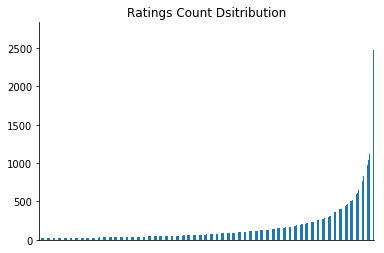

In [4]:
df = ratings.drop_columns(columns='movieId').to_pandas_dataframe()
df = df.groupby('userId').count().sort_values(by='rating')
plot = df.plot(kind='bar', legend=None, title='Ratings Count Dsitribution')
plot.axes.get_xaxis().set_visible(False)
plot.axes.spines['top'].set_visible(False)
plot.axes.spines['right'].set_visible(False)

# Discounted cumulative gain
Test out metric

In [5]:
x = query_ratings(ratings, 1, 20)
pred = np.array([4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5])

In [6]:
ndcg(pred, x)

0.8968961188783916

In [7]:
ndcg(np.array([5,5,5,5,5]), np.array([5,3,4,4,4]))

1.2120701022722418

In [8]:
ndcg(np.array([5,3,4,4,4]), np.array([5,5,5,5,5]))

0.8250347881078177

# Mean Average Precision
Measuring Precision as:
$$precision = \frac{\left|{\{relevant\ documents\}} \cap {\{retrieved\ documents\}}\right|}{\left|{\{relevant\ documents\}}\right|}$$
Average Precision as:
$$AveP = \frac{\sum_{k=1}^{n} (P(k) \times rel(k))}{number\ of\ relevant\ documents}$$
where $rel(k)$ is an indicator function equaling 1 if the item at rank $k$ is relevant, zero otherwise. $P(k)$ is the precision at cut-off $k$, $n$ is the number of retrieve documents.
Mean Average Precision is then:
$$MAP = \frac{\sum_{q=1}^{Q}AveP(q)}{Q}$$